In [0]:
import numpy as np
# os hago el trabajo más duro
# todo un detalle   ;)

# Introducción 

La idea de la práctica es visitar aquellos temas que en cierta manera nos permitan ver más contenido del curso.

La práctica esta dividida en 4 o 5 subapartados, que ya tenéis en este mismo Notebook. Estos subapartados estan aquí para que rellenéis el código que hace falta para la realización de la práctica. Obviamente podéis usar tantas celdas como os hagan falta, es más es de agradecer si el código final esta algo "limpio". Usar funciones, algo de comentario, etc, etc...

Usaremos 2 datasets, uno para el primer ejercicio, y otro para el resto de ejercicios.

Ejercicios:


1.   Machine Learning vs Deep Learning (Acordaros que hay que implementar el pipeline visto en clase entero)

    1.1. Implementación de un modelo de Sentiment Analysis con algún algoritmo de Machine Learning Clásico.
    
    1.2. Implementación de un modelo de Sentiment Analysis con alguna arquitectura de Deep Learning.
    
    1.3. Breve Comparación de resultados. Confusion Matrix.
    
2. Hacer Analysis de los tweets del segundo dataset. Que temas aparecen? Como se representan estos temas? De que hablan unos y otros?

3. Escoged a uno de los dos presidentes, y escribid tweets como ellos, usando un Modelo Generativo.

En cada ejercicio, espero explicaciones y razonamientos del porque una arquitectura y no otra, por ejemplo en Deep Learning, porque usar Convolutionals en lugar de recurrentes, o en Machine Learning, Bayes en lugar de SVM. Hay que explicar el pipeline, sobretodo el preproceso de datos, con lo que habrá que hacer un pequeño estudio de que datos tenemos, y si hay cosas que se pueden ignorar, si hacéis stemming, o no, etc, etc...

Acordaros de que objetivo final no es que obtengáis una accuracy brutal, es que comprendais que pasa cuando usais un algoritmo u otro, y que problemas o beneficios nos dan.

![](https://i.pinimg.com/736x/19/63/8c/19638c0b33e2f7822d6806ce31d89d84--funny-cartoons-funny-jokes.jpg =400x)

Mucha suerte y ánimo!



# Machine Learning

## Dataset

Cargamos dataset

In [0]:
from google.colab import files
import io

# cargar
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


# pandas
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['train_sentiment_utf8.csv'].decode('utf-8')))
df

Saving train_sentiment_utf8.csv to train_sentiment_utf8.csv
User uploaded file "train_sentiment_utf8.csv" with length 8777569 bytes


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


## Librerías

In [0]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install stop_words

    100% |████████████████████████████████| 17.6MB 2.1MB/s 
    100% |████████████████████████████████| 92kB 15.7MB/s 
    100% |████████████████████████████████| 1.2MB 13.2MB/s 
    100% |████████████████████████████████| 51kB 15.1MB/s 
    100% |████████████████████████████████| 194kB 19.7MB/s 
    100% |████████████████████████████████| 153kB 11.0MB/s 
    100% |████████████████████████████████| 604kB 16.4MB/s 
    100% |████████████████████████████████| 51kB 12.7MB/s 
    100% |████████████████████████████████| 389kB 17.5MB/s 
    100% |████████████████████████████████| 143kB 15.7MB/s 
  Running setup.py bdist_wheel for spacy ... done
  Stored in directory: /content/.cache/pip/wheels/fb/00/28/75c85d5135e7d9a100639137d1847d41e914ed16c962d467e4
  Running setup.py bdist_wheel for murmurhash ... done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... done
  Stored in directory: /cont

In [0]:
import spacy
from stop_words import get_stop_words
from string import punctuation
import re
import warnings
warnings.filterwarnings('ignore')

from random import sample

from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer

## Preprocesamiento de datos

In [0]:
stop_words = get_stop_words('en')
nlp = spacy.load('en_core_web_sm')

In [0]:
len(df)

99989

In [0]:
len(stop_words)

174

In [0]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

Preprocesamos los datos, y hacemos algo de "limpieza". Observamos que hay palabras dentro de la lista de stop-words que podrían influir en el proceso de clasificación, por lo que, después de probar incluyendo dichas palabras y sin incluirlas, decido incluirlas ya que el resultado es mejor.

In [0]:
row = 0
while (row < len(df)):
  # Recupramos texto a preprocesar
  doc = df.loc[row, 'SentimentText']
  
  # Eliminamos espacios sobrantes a izquierda y derecha
  doc = doc.lstrip()
  doc = doc.rstrip()
  
  # Lo ponemos en minuscula
  doc = doc.lower()
  
  # Eliminamos números
  doc = re.sub('[0123456789]', '', doc)
  
  # Eliminar caracteres repetidos
  doc = re.sub(r'([a-z])\1+', r'\1', doc)
  
  # Eliminamos stop_words
  docOut = ''
  for word in doc.split():
    wordOut = ''
    # Signos de puntuacion
    for letter in word:
      if (letter not in list(punctuation)):
        wordOut += letter
    # Stop-words y caracteres sueltos
    # if (wordOut not in stop_words) and (len(wordOut) > 1):
    # Caracteres sueltos
    if (len(wordOut) > 1):
      docOut += wordOut + ' '
      
  # Asignamos texto preprocesado
  df.loc[row, 'SentimentText'] = docOut
  row += 1

Transformamos el dataset para poder adaptarlo al problema, eitquetando cada una de las frases como "Triste" o "No triste"

In [0]:
sentiment_dataset = []
for index, row in df.iterrows():   
  label = '<SAD>' if (row[1] == 0) else '<NOT_SAD>'
  sentence = row[2]
  sentiment_dataset.append((sentence, label))

print(sentiment_dataset[0])
len(sentiment_dataset)

('is so sad for my apl friend ', '<SAD>')


99989

Tomamos muestras aleatorios y comprobamos resultado

In [0]:
sample([x for x, y in sentiment_dataset if y=='<NOT_SAD>'], 5)

['afterthought let us know how it goes id like to se it ',
 'aravindkumar thanks for tht neded to give an old friend fedback abt bing thisl come in handy ',
 'arielegore you know it was filmed only hours ago right patience ',
 'turnofwords its to big ',
 'beckieilson wel you sem to have the hang of it now how are you ']

In [0]:
sample([x for x, y in sentiment_dataset if y=='<SAD>'], 5)

['babybanana lol yep and its stil chily here ',
 'my spaz deck isnt working have to get on my other acount somehow ',
 'budhaliscious nope not until around am est tonight bo ',
 'bethpety nothing exciting what about you im not going to dalas just planing an event for other people to go to dalas ',
 'tumy ache ']

Dividimos los datos para entrenamiento y validacion

In [0]:
dataset_aux = sentiment_dataset

In [0]:
# Funcion que divide los datos de entrada para entrenamiento y validacion
def split_train_val_test(dataset, split = 0.2):
    x, y = zip(*dataset)
    x = np.array(list(x))
    y = np.array(list(y))
    sss = StratifiedShuffleSplit(n_splits=1, test_size=split, random_state=1337)
    for train_index, test_index in sss.split(x, y):
        x_train, x_val = x[train_index], x[test_index]
        y_train, y_val = y[train_index], y[test_index]
    splits = {'train':(x_train, y_train), 'test':(x_val, y_val)}
    return splits

In [0]:
split = split_train_val_test(sentiment_dataset)

In [0]:
split_aux = split

Creamos el pipeline correspondiente a Bayes en sklearn

In [0]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

Vemos qué parámetros podemos intentar optimizar

In [0]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])

Asignamos rangos de valores distintos a los parámetros que nos interesan, para quedarnos luego con los que hayamos tenido mejores resultados

In [0]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 2), (1, 3), (2, 3), (1,4)),
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2')
}

Definimos nuestro cross validation

In [0]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1, verbose=1)

Ajustamos, y nos quedamos con los parámetros más óptimos obtenidos

In [0]:
grid_search.fit(split['train'][0], split['train'][1])
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print("Best score: %0.3f" % grid_search.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 26.2min finished


	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__ngram_range: (1, 2)
Best score: 0.753


No me convence... Si quitamos la capa de tfidf salen mejores resultados. Supongo que es porque en realidad no hace falta, ya que no estamos ante un caso de Information Retrieval sino de Clasificación

In [0]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [0]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 2), (1, 3), (2, 3), (1,4))
}

In [0]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1, verbose=1)

In [0]:
grid_search.fit(split['train'][0], split['train'][1])
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print("Best score: %0.3f" % grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  6.0min finished


	vect__max_df: 0.5
	vect__ngram_range: (1, 2)
Best score: 0.769


Hacemos las predicciones usando los datos de validación, y configurando el modelo con los parámetros que mejor resultado nos dieron en el cross-validation ejecutado anteriormente

In [0]:
pipeline.set_params(**best_parameters)
predictions = pipeline.score(split['test'][0], split['test'][1])
print('TEST SCORE: {}'.format(predictions))

TEST SCORE: 0.7794279427942794


Ahora vamos a comprobar que somos capaces de realizar las predicciones correctamente  
Primeramente, cogemos una muestra de datos que sabemos que son de frases que no expresan tristeza, y comparamos con lo que predice nuestro modelo

In [0]:
is_sad = sample([x for x, y in sentiment_dataset if y =='<NOT_SAD>'], 10)
is_sad

['anakinsky wel think of silver card as quotwhite goldquot same color although highly elegant ',
 'beautyadict your site is great ',
 'blindcriple lurvely enjoy it ',
 'andyrodick but you gota give major props to yourself for geting through the first rounds without droping set ',
 'bcinfrance lol no enjoy it realy now going to get nice cup of tea made for me and slice of aple tart to relax with ',
 'rodavis makes sense to me big govt is inherently destructive to liberty without maximum liberty justice fails as wel simple ',
 'beauty ',
 'chibiryan aw hope to se then ',
 'amandinha wanted to se who you were folowing hahahah ',
 'averyfaneactual lol gues that would make sense ']

In [0]:
predictions = pipeline.predict(is_sad)
predictions_probs = pipeline.predict_proba(is_sad)
for x, y, p in zip(is_sad, predictions, predictions_probs):
    print('{} ------> {} {}'.format(x, y, p))

anakinsky wel think of silver card as quotwhite goldquot same color although highly elegant  ------> <NOT_SAD> [9.99998665e-01 1.33476730e-06]
beautyadict your site is great  ------> <NOT_SAD> [0.99356242 0.00643758]
blindcriple lurvely enjoy it  ------> <NOT_SAD> [0.9824142 0.0175858]
andyrodick but you gota give major props to yourself for geting through the first rounds without droping set  ------> <NOT_SAD> [9.99999071e-01 9.29275669e-07]
bcinfrance lol no enjoy it realy now going to get nice cup of tea made for me and slice of aple tart to relax with  ------> <NOT_SAD> [9.99921318e-01 7.86822956e-05]
rodavis makes sense to me big govt is inherently destructive to liberty without maximum liberty justice fails as wel simple  ------> <NOT_SAD> [9.99986952e-01 1.30478094e-05]
beauty  ------> <NOT_SAD> [0.77964419 0.22035581]
chibiryan aw hope to se then  ------> <NOT_SAD> [0.96585607 0.03414393]
amandinha wanted to se who you were folowing hahahah  ------> <NOT_SAD> [0.99482231 0.0051

Parece que no ha ido mal. Ahora, probamos con frases que sí expresan tristeza, a ver si somos capaces de predecerlas también

In [0]:
is_sad = sample([x for x, y in sentiment_dataset if y =='<SAD>'], 10)
is_sad

['buildabear wil any of these cute pups ever come to singapore we have litle selections here ',
 'anietulo what pic are you refering to the wonder woman ho pic or the flopy haired rob gif cant believe changed ur pic ',
 'cazp god to hear your okaymy day has ben god wheather not so god how was your course work today ',
 'inaperfectworld would have one last chance ',
 'bradleyf told on you cuz felt bad for marge thought she deserved the truth sory man ',
 'alexaltimelow haha wasnt even done blocking everyone ',
 'becyw last time read centenarian droped it dads st ed of the stone lectures on calvinism by abraham kuyper wasnt much fun ',
 'aprilfdlwi aw that sucks damnthose flod waters ',
 'abs hope today gets beter for you hugs ',
 'aronshust yeah nh prety much only has soulfest once year during the sumer for christian concerts ']

In [0]:
predictions = pipeline.predict(is_sad)
predictions_probs = pipeline.predict_proba(is_sad)
for x, y, p in zip(is_sad, predictions, predictions_probs):
    print('{} ------> {} {}'.format(x, y, p))

buildabear wil any of these cute pups ever come to singapore we have litle selections here  ------> <SAD> [0.00221321 0.99778679]
anietulo what pic are you refering to the wonder woman ho pic or the flopy haired rob gif cant believe changed ur pic  ------> <SAD> [1.68248660e-04 9.99831751e-01]
cazp god to hear your okaymy day has ben god wheather not so god how was your course work today  ------> <SAD> [0.00459666 0.99540334]
inaperfectworld would have one last chance  ------> <SAD> [9.07204270e-06 9.99990928e-01]
bradleyf told on you cuz felt bad for marge thought she deserved the truth sory man  ------> <SAD> [1.59127389e-06 9.99998409e-01]
alexaltimelow haha wasnt even done blocking everyone  ------> <SAD> [0.00796467 0.99203533]
becyw last time read centenarian droped it dads st ed of the stone lectures on calvinism by abraham kuyper wasnt much fun  ------> <SAD> [1.61692503e-09 9.99999998e-01]
aprilfdlwi aw that sucks damnthose flod waters  ------> <SAD> [1.88347518e-06 9.99998117

Vemos que, aunque el score no es muy alto, sí que parece que somos capaces de predecir correctamente si las frases expresan tristeza o no

## Otras Métricas

Vamos a evaluar la eficiencia del modelo usand más métricas

In [0]:
split['test'][0]

array(['crunchyk mistato amp ashleighm were caling perez hilton not you jerkthe blockheads got nutin but love for you ',
       'courageousone id prepfer to be doing it with someone to be honest but im thankful for my children regardles ',
       'abyrosia thank you ', ...,
       'taylor ha realy wana dude me you and car miley cyrus metro station ',
       'calpolypomona thanks ', 'cant get this twiter '], dtype='<U713')

Predecimos los datos de test

In [0]:
y_pred = pipeline.predict_proba(split['test'][0])

Adaptamos los valores obtenidos para poder compararlos

In [0]:
# Valores de la prediccion
y_pred_test = []
for a, b in y_pred:
  if (a > 0.5):
    a = 1
  else:
    a = 0
  if (b > 0.5):
    b = 1
  else:
    b = 0

  if (len(y_pred_test) == 0):
    y_pred_test = np.array([[float(a), float(b)]])
  else:
    new_item = np.array([[float(a), float(b)]])
    y_pred_test = np.concatenate((y_pred_test, new_item), axis = 0)

In [0]:
y_pred_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [0]:
# Valores de la validacion
y_test = []
for item in split['test'][1]:
  if (item == '<SAD>'):
    new_item = [0.,1.]
  else:
    new_item = [1.,0.]
  
  if (len(y_test) == 0):
    y_test = np.array([new_item])
  else:
    y_test = np.concatenate((y_test, np.array([new_item])), axis = 0)

In [0]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


Definimos métodos auxiliares para representar la matriz de confusión y otras métricas

In [0]:
# Definimos funcion para representar matriz de confusion# Definim 
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()
    

# Definimos funcion para calcular metricas
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

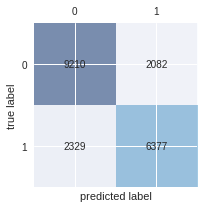

ACC:  0.7794279427942794
SEN:  0.7324833448196646
ESP:  0.8156216790648246
PPV:  0.7538716160302636
FSC:  0.7430235945237402


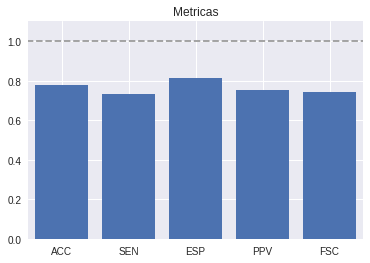

In [0]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión y metricas (Entrenamiento)
# confmat = confusion_matrix(split['test'][1].argmax(axis = 1), y_pred_test.argmax(axis = 1))
confmat = confusion_matrix(y_test.argmax(axis = 1), y_pred_test.argmax(axis = 1))
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

# Deep Learning

Ahora vamos a intentar usar un algoritmo de Deep Learning, y compararemos resultados

## Preprocesamiento de datos

Formamos un dataset, compuesto de tuplas de sentencias y código de sentimiento (0 = triste, 1 = no triste)  
(el dataframe fue preprocesado en el apartado anterior de machine learning)

In [0]:
dataset = []
for row in df.iterrows():
    ix, data = row
    dataset.append((data[2], data[1]))

Vamos a tokenizar las sentencias de cada tupla, quedándonos con cada una de las palabras que la componen, y las guardamos en tokens  
Además, en tokenized, grabamos las sentencias tokenizadas (divididas por palabras)

In [0]:
# Tokenizamos los documentos
tokens = []
tokenized = []
for x, y in dataset:
    x_t = nlp(x)
    toks = [t.text for t in x_t]
    tokens+= toks
    tokenized.append((toks, y)) 

Creamos el vocabulario

In [0]:
from collections import Counter

vocab_counter = Counter(tokens)
vocab = set(tokens)
print('Num de features a usar: ', len(vocab))  
print(len(tokenized))   

Num de features a usar:  108355
99989


In [0]:
# Longitud maxima de documento
maxlen = max([len(x) for x, _ in tokenized])
print('Maxlen: ', maxlen)

Maxlen:  113


In [0]:
# Longitud de todos los documentos
lens = [len(x) for x, _ in tokenized]

# Calculamos mediana, media y maxima longitud
median = np.median(np.array(lens))
mean = np.mean(np.array(lens))
maxlen = int(median)*2
print('Mediana: ', median)
print('Media: ', mean)
print('Maxlen ', maxlen)

Mediana:  12.0
Media:  12.575383292162138
Maxlen  24


Filtramos, y nos quedamos con los documentos cuya longitud sea menor de 24 palabras (la máxima longitud es de 113)

In [0]:
tokenized_filtered = [(x, y) for x, y in tokenized if len(x) < maxlen]
len(tokenized_filtered)

93960

Asignamos un ID a cada token (palabra) del vocabulario

In [0]:
# Construir el vocabulario como siempre, dandole un ID a cada palabra del vocabulario
w2id = {k:i for i, k in enumerate(vocab)}
w2id['<UNK>'] = len(w2id)

Asignamos id también a las labels

In [0]:
labels = ['Sad',
            'Not_Sad',
         ]

In [0]:
l2id = {label:i for i, label in enumerate(labels)}
l2id

{'Not_Sad': 1, 'Sad': 0}

## Padding + Input preparation

Formamos la entrada, que consistirá en un vector de 24 posiciones, que representarán cada token del vocabuario, y en un vector de dos posiciones, que representará las clases que queremos predecir

In [0]:
# Preparar Input. Padding. Conversión a input
# maxlen = min(maxlen, 50)
input_ready = []
for x, y in tokenized_filtered:
    sentence = np.zeros((maxlen))
    label = np.zeros((len(labels)))
    label[int(y)-1] = 1
    for i, t in enumerate(x):
        sentence[i] = w2id[t] if t in vocab_counter and vocab_counter[t] >= 5 else w2id['<UNK>']
    input_ready.append((sentence,label))

# Vemos resultado
input_ready[0]

(array([  5888.,  43607.,  28660.,  69330.,  75010., 108355.,  84385.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.]), array([0., 1.]))

In [0]:
# Mostramos la shape de la sentencia
input_ready[0][0].shape

(24,)

In [0]:
# Mostramos la shape de la clase
input_ready[0][1].shape

(2,)

Dividimos los datos de entrenamiento y validación con el método creado en el apartado anterior de machine learning

In [0]:
# Dividimos las datos de entrenamiento y validacion
split_dl = split_train_val_test(input_ready)
# Mostramos las shapes de cada uno de ellos
print(split_dl['train'][0].shape)
print(split_dl['train'][1].shape)

# Vector de outputs
split_dl['train'][1]

(75168, 24)
(75168, 2)


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

Importamos las librerías necesarias

In [0]:
from keras.layers import Embedding
from keras.layers import Flatten, Input, Dense, Dropout
from keras.models import Model

Using TensorFlow backend.


Creamos el modelo, en la que usamos una capa de Embedding, varias de dropout para regularizar e intentar minimizar el over fitting, Relu como función de activación para la entrada, y sigmoid como función de activación para la salida

In [0]:
input_layer = Input(shape=(maxlen,) )
embedding = Embedding(output_dim=100, input_dim=len(w2id), input_length=maxlen)(input_layer)
dense_1 = Dense(100, activation='relu')(embedding)
drop_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(100, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(dense_2)
out = Dense(len(l2id), activation='softmax')(drop_2)

model = Model(inputs=input_layer, outputs=out)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 24, 100)           10835600  
_________________________________________________________________
dense_1 (Dense)              (None, 24, 100)           10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 100)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 24, 100)           10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 100)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 24, 2)             202       
Total para

Observamos que la shape del output no es correcto.  
Usaremos arquitectura DAN (Deep Averaging Networks)

In [0]:
from keras.layers import Average, average, Lambda
from keras import backend as K

In [0]:
# Funciónes auxiliares
def mask_aware_mean(x):
    # recreate the masks - all zero rows have been masked
    mask = K.not_equal(K.sum(K.abs(x), axis=2, keepdims=True), 0)
    # number of that rows are not all zeros
    n = K.sum(K.cast(mask, 'float32'), axis=1, keepdims=False)
    # compute mask-aware mean of x
    x_mean = K.sum(x, axis=1, keepdims=False) / n
    return x_mean

def mask_aware_mean_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 3
    return (shape[0], shape[2])

Rehacemos el modelo, añadiendo una capa que hace un promedio de los embeddings a través de las mascaras creadas en los métodos anteriores.

In [0]:
input_layer = Input(shape=(maxlen,) )
embedding = Embedding(output_dim=100, input_dim=len(w2id), input_length=maxlen)(input_layer)
doc_representation = Lambda(mask_aware_mean, mask_aware_mean_output_shape, name='embedding_average')(embedding)
dense_1 = Dense(100, activation='relu')(doc_representation)
drop_1 = Dropout(0.8)(dense_1)
dense_2 = Dense(100, activation='relu')(drop_1)
drop_2 = Dropout(0.8)(dense_2)
out = Dense(len(l2id), activation='softmax')(drop_2)

model = Model(inputs=input_layer, outputs=out)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 24)                0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 24, 100)           10835600  
_________________________________________________________________
embedding_average (Lambda)   (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
__________

Ahora sí que parecen correctos los shapes  
Entrenemos el modelo. Ponemos sólo 5 épocas, ya que con más se sobre ajusta

In [0]:
# Entrenamos el modelo
model.fit(split_dl['train'][0], split_dl['train'][1],
          epochs = 5,
          batch_size = 512)

Epoch 1/5
75168/75168 [==============================] - 3s 41us/step - loss: 0.6434 - acc: 0.6184
Epoch 2/5
75168/75168 [==============================] - 2s 33us/step - loss: 0.5187 - acc: 0.7605
Epoch 3/5
75168/75168 [==============================] - 3s 34us/step - loss: 0.4751 - acc: 0.7870
Epoch 4/5
75168/75168 [==============================] - 3s 34us/step - loss: 0.4524 - acc: 0.7974
Epoch 5/5
75168/75168 [==============================] - 3s 34us/step - loss: 0.4398 - acc: 0.8026


Comprobamos prediciendo los datos de validación

In [0]:
score_avg_emb = model.evaluate(split_dl['test'][0], split_dl['test'][1], batch_size=512)

print('Test Loss: ', score_avg_emb[0])
print('Test Accuracy: ', score_avg_emb[1])

18792/18792 [==============================] - 0s 12us/step
Test Loss:  0.47939949085885997
Test Accuracy:  0.7719774368774541


## Otras Métricas

Predecimos valores

In [0]:
y_pred_dl = model.predict(split_dl['test'][0])

Adaptamos los valores que hemos obtenido

In [0]:
y_pred_test_dl = []
for a, b in y_pred_dl:
  if (a > 0.5):
    a = 1
  else:
    a = 0
  if (b > 0.5):
    b = 1
  else:
    b = 0

  if (len(y_pred_test_dl) == 0):
    y_pred_test_dl = np.array([[float(a), float(b)]])
  else:
    new_item = np.array([[float(a), float(b)]])
    y_pred_test_dl = np.concatenate((y_pred_test_dl, new_item), axis = 0)

Vemos matriz de confusión, y el resto de métricas obtenidas

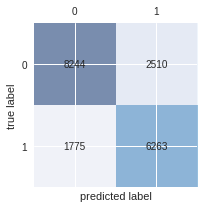

ACC:  0.7719774372073223
SEN:  0.7791739238616572
ESP:  0.7665984749860517
PPV:  0.7138949048216118
FSC:  0.7451073701742907


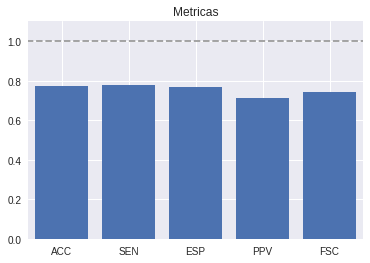

In [0]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión y metricas (Entrenamiento)
confmat = confusion_matrix(split_dl['test'][1].argmax(axis = 1), y_pred_test_dl.argmax(axis = 1))
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

## CNN

Vamos a probar ahora con una red convolucional, a ver qué resultado nos sale

Importamos las librerías

In [0]:
from keras.layers import MaxPooling1D, GlobalMaxPooling1D, Conv1D, Concatenate

Creamos el modelo, en el que añadimos las capas convolucionales propiamente dichas, así como un par de capas de MaxPooling para diezmar el mapa de activaciones, las cuales concatenaremos posteriormente. El resto de capas son semejantes al modelo anterior

In [0]:
embedding_dim = 100

input_layer = Input(shape=(maxlen,))
embedding = Embedding(output_dim=embedding_dim, input_dim=len(w2id), input_length=maxlen)(input_layer)

conv_1 = Conv1D(filters=50, kernel_size=1, strides=1, activation='relu', padding='valid')(embedding)
mp_1 = GlobalMaxPooling1D()(conv_1)

conv_2 = Conv1D(filters=50, kernel_size=2, strides=1, activation='relu', padding='valid')(embedding)
mp_2 = GlobalMaxPooling1D()(conv_2)

conv_5 = Conv1D(filters=50, kernel_size=5, strides=1, activation='relu', padding='valid')(embedding)
mp_5 = GlobalMaxPooling1D()(conv_5)

doc_representation = Concatenate()([mp_1, mp_2, mp_5])

dense_1 = Dense(100, activation='relu')(doc_representation)
drop_1 = Dropout(0.8)(dense_1)
dense_2 = Dense(100, activation='relu')(drop_1)
drop_2 = Dropout(0.8)(dense_2)
out = Dense(len(l2id), activation='softmax')(drop_2)

model_cnn = Model(inputs=input_layer, outputs=out)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_cnn.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 24)           0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 24, 100)      10835600    input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 24, 50)       5050        embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 23, 50)       10050       embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_12 

Entrenamos el modelo

In [0]:
model_cnn.fit(split_dl['train'][0], split_dl['train'][1],
          epochs = 5,
          batch_size=512)

Epoch 1/5
75168/75168 [==============================] - 4s 59us/step - loss: 0.6165 - acc: 0.6454
Epoch 2/5
75168/75168 [==============================] - 4s 50us/step - loss: 0.4973 - acc: 0.7698
Epoch 3/5
75168/75168 [==============================] - 4s 51us/step - loss: 0.4528 - acc: 0.7983
Epoch 4/5
75168/75168 [==============================] - 4s 51us/step - loss: 0.4152 - acc: 0.8186
Epoch 5/5
75168/75168 [==============================] - 4s 52us/step - loss: 0.3737 - acc: 0.8394


Comprobamos resultado

In [0]:
score_cnn = model_cnn.evaluate(split_dl['test'][0], split_dl['test'][1], batch_size=512)

print('Test Loss: ', score_cnn[0])
print('Test Accuracy: ', score_cnn[1])

18792/18792 [==============================] - 0s 19us/step
Test Loss:  0.4956135315152116
Test Accuracy:  0.7799595576136505


## Otras Métricas

In [0]:
y_pred_cnn = model_cnn.predict(split_dl['test'][0])

In [0]:
y_pred_test_cnn = []
for a, b in y_pred_cnn:
  if (a > 0.5):
    a = 1
  else:
    a = 0
  if (b > 0.5):
    b = 1
  else:
    b = 0

  if (len(y_pred_test_cnn) == 0):
    y_pred_test_cnn = np.array([[float(a), float(b)]])
  else:
    new_item = np.array([[float(a), float(b)]])
    y_pred_test_cnn = np.concatenate((y_pred_test_cnn, new_item), axis = 0)

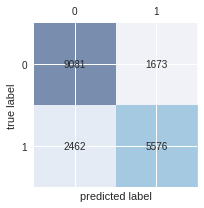

ACC:  0.7799595572584078
SEN:  0.693704901716845
ESP:  0.8444299795424958
PPV:  0.7692095461442958
FSC:  0.729508732910316


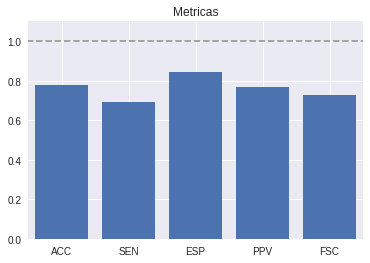

In [0]:
# Matriz de confusión y metricas (Entrenamiento)
confmat = confusion_matrix(split_dl['test'][1].argmax(axis = 1), y_pred_test_cnn.argmax(axis = 1))
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

# Conclusiones

La verdad es que los resultados son muy semejantes, y apenas es posible optimizarlos mucho más.  
Dada la complejidad y el coste computacional de los algoritmos que se aplican en deep learning, yo optaría siempre por probar con Naive Bayes primero, por su simplicidad y buenos resultados

# Sentiment Analysis with Politics

Cargamos dataset

In [0]:
from google.colab import files
import io

# cargar
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


# pandas
import pandas as pd

df_politics = pd.read_json(io.StringIO(uploaded['dataset2.json'].decode('utf-8')))
df_politics

Saving dataset2.json to dataset2 (4).json
User uploaded file "dataset2.json" with length 1070528 bytes


,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
label,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,...,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA
tweet,"“Low plastic stool, cheap but delicious noodle...","“Low plastic stool, cheap but delicious noodle...",Michelle and I are so inspired by all the youn...,Senate leaders' obstruction of our Supreme Cou...,"In 31 states, people can still be fired becaus...","Seven down, one more to go. Make sure you tune...",Have you entered yet? You and a friend could w...,Check out five big victories that made 2015 a ...,Suit up—it's President Obama's final State of ...,You can still join the team fighting for progr...,...,You don't want to miss this. Say you'll tune i...,LAST CALL: You could be going on a seven-day c...,Thinking of ways you can help out over the nex...,DEADLINE: Chip in to help fund the fight for m...,You and a friend could be heading north. Enter...,TONIGHT: Come in with the clutch contribution ...,Global climate action became a reality this ye...,Chip in to help gear up for the big fights in ...,Here's your chance to get lost in the beauty o...,Get ready—the deadline to pitch in before the ...


Dada la naturaleza del problema, transponemos el dataframe para adaptarlo al mismo

In [0]:
# Transponemos el dataframe
df_politics = df_politics.T
df_politics.head(5)

,label,tweet
0,OBAMA,"“Low plastic stool, cheap but delicious noodle..."
1,OBAMA,"“Low plastic stool, cheap but delicious noodle..."
10,OBAMA,Michelle and I are so inspired by all the youn...
100,OBAMA,Senate leaders' obstruction of our Supreme Cou...
1000,OBAMA,"In 31 states, people can still be fired becaus..."


Cargamos las librerías

In [0]:
!pip install gensim
!pip install pyLDAvis
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install stop_words

    1% |▋                               | 727kB 3.6MB/s eta 0:00:11    100% |████████████████████████████████| 37.4MB 43.4MB/s 

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [0]:
import gensim
from os.path import join
import csv
import spacy
from stop_words import get_stop_words
from string import punctuation
import re
import numpy as np
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import pandas as pd
import io

import warnings
warnings.filterwarnings('ignore')

In [0]:
stop_words = get_stop_words('en')
nlp = spacy.load('en_core_web_sm')

Preprocesamos los datos y hacemos algo de "limipieza" de los mismos

In [0]:
# Agrego un signo de puntuacion que no estaba

punctuation = punctuation + '“'
punctuation = punctuation + '—'
'''
punctuation = punctuation + '🇺'
punctuation = punctuation + 's'
punctuation = punctuation + '🇸'
'''

row = 0
documents = []
for row in df_politics.iterrows():
  # Recupramos texto a preprocesar
  doc = row[1][1]
  
  # Eliminamos espacios sobrantes a izquierda y derecha
  doc = doc.lstrip()
  doc = doc.rstrip()
  
  # Lo ponemos en minuscula
  doc = doc.lower()
  
  # Eliminamos números
  doc = re.sub('[0123456789]', '', doc)
  
  # Eliminar caracteres repetidos
  doc = re.sub(r'([a-z])\1+', r'\1', doc)
  
  # Eliminamos stop_words
  docOut = ''
  for word in doc.split():
    wordOut = ''
    # Signos de puntuacion
    for letter in word:
      if (letter not in list(punctuation)):
        wordOut += letter
    # Stop-words y caracteres sueltos
    if (wordOut not in stop_words) and (len(wordOut) > 1): # and (not wordOut.startswith('htp')) and ('’' not in wordOut) and
      docOut += wordOut + ' '
      
  # Tokenizamos y almacenamos
  tokenizedDocOut = [t.text for t in nlp(docOut)] # if t.pos_ in ['ADJ', 'VERB', 'ADV', 'NOUN']]
  documents.append(tokenizedDocOut)
  

In [0]:
len(documents)

5889

Creamos el diccionario

In [0]:
vocab = set([t for doc in documents for t in doc])
w2id = {k:i for  i,k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}
print('{} unique tokens'.format(len(w2id)))

12357 unique tokens


In [0]:
from gensim.corpora import Dictionary
gensim_dict = Dictionary(documents)
len(gensim_dict)

12357

Creamos el bag of words

In [0]:
corpus = [gensim_dict.doc2bow(doc) for doc in documents]

In [0]:
len(corpus)

5889

Implementamos usando Gensim

In [0]:
# Librerias
from gensim import corpora, models, similarities

Primero probamos con un modelo de 50 topics

In [0]:
# Creamos el modelo
lda_big = models.LdaModel(corpus, id2word=gensim_dict, num_topics=50, iterations=5, passes=20, alpha='auto')
print(lda_big.bound(corpus))
vis = pyLDAvis.gensim.prepare(lda_big, corpus, gensim_dict)
pyLDAvis.display(vis)

-657152.2502957582


Observamos que hay muchos topics disperos, y algunos que se superponen  
Probaremos con menos, con 20 topics

In [0]:
lda_mid = models.LdaModel(corpus, id2word=gensim_dict, num_topics=20, iterations=5, passes=20, alpha='auto')
print(lda_mid.bound(corpus))
vis = pyLDAvis.gensim.prepare(lda_mid, corpus, gensim_dict)
pyLDAvis.display(vis)

-644975.3369995952


Aunque menos dispersos, siguen superponiéndose  
Probamos con 10 topics

In [0]:
lda_small = models.LdaModel(corpus, id2word=gensim_dict, num_topics=10, iterations=5, passes=20, alpha='auto')
print(lda_small.bound(corpus))
vis = pyLDAvis.gensim.prepare(lda_small, corpus, gensim_dict)
pyLDAvis.display(vis)

-636617.481472969


In [0]:
lda_tiny = models.LdaModel(corpus, id2word=gensim_dict, num_topics=3, iterations=5, passes=20, alpha='auto')
print(lda_tiny.bound(corpus))
vis = pyLDAvis.gensim.prepare(lda_tiny, corpus, gensim_dict)
pyLDAvis.display(vis)

-617506.8550024033


Parece que tiene más sentido. De todas formas, en lugar de "adivinar", intentaremos determinar el número óptimo de topics en función de la coherencia obtenida probando con topics de 1 a 40

Método auxiliar, para ver con cual nos quedamos

In [0]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=5, passes=20, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

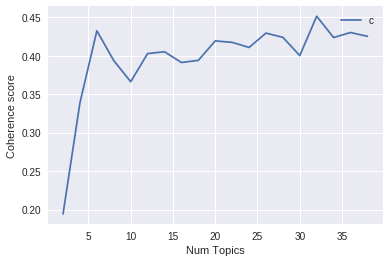

In [0]:
limit=40; start=2; step=2;
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dict, corpus=corpus, texts=documents, start=start, limit=limit, step=step)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Después de numerosas pruebas (y varios quebraderos de cabeza con Colab), parece que, según el gráfico, habría que probar con 6 topics 

In [0]:
lda_tiny = models.LdaModel(corpus, id2word=gensim_dict, num_topics=6, iterations=5, passes=20, alpha='auto')
print(lda_tiny.bound(corpus))
vis = pyLDAvis.gensim.prepare(lda_tiny, corpus, gensim_dict)
pyLDAvis.display(vis)

-630002.3166752458


El topic 1 parece que hace referencia a la victoria de Obama (Demócrata) sobre los Republicanos en las elecciones  
El topic 2 trata sobre las conocidas como "fake news", y hacen referencia a las injerencias rusas en las elecciones, Hillary Clinton, FBI, etc.  
El Topic 3 es sobre el el Discurso del Estado de la Unión (SOTU, State of the Union Address) que es un discurso que hace el presidente, en este caso Obama, sobre el estado del país. Se hace referencia a la energía, economía, trabajo, progreso, etc.  
El topic 4 es sobre una entrevista en vivo que va a realizar Obama en T.V.  
El topic 5 trata sobre el cambio climático y el Obamacare  
El topic 6 es sobre el atentado terrorista ocurrido en Londres, y las condolencias expresadas a la Primera Ministra Theresa May   

## Tweet Generation

#### Imports

In [0]:
!pip install spacy
!python -m spacy download en_core_web_sm

    100% |████████████████████████████████| 22.0MB 1.8MB/s 
    100% |████████████████████████████████| 122kB 22.3MB/s 
    100% |████████████████████████████████| 1.2MB 7.8MB/s 
    100% |████████████████████████████████| 194kB 20.4MB/s 
    100% |████████████████████████████████| 153kB 20.9MB/s 
    100% |████████████████████████████████| 604kB 16.9MB/s 
    100% |████████████████████████████████| 317kB 16.6MB/s 
    100% |████████████████████████████████| 450kB 19.1MB/s 
    100% |████████████████████████████████| 51kB 14.3MB/s 
  Running setup.py bdist_wheel for spacy ... done
  Stored in directory: /content/.cache/pip/wheels/60/0b/bb/7c2e28db574dbb2358176934eddd32a1c5f838ba0bc23eaaab
  Running setup.py bdist_wheel for murmurhash ... done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a

In [0]:
import spacy
import numpy as np

import pickle
import json
import os
import csv
import pprint as pp

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from random import shuffle, choice, sample

from sklearn.model_selection import StratifiedShuffleSplit

from copy import copy

import warnings
warnings.filterwarnings('ignore')

nlp = spacy.load('en_core_web_sm')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display

sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [0]:
from keras.models import Model, Sequential
from keras.layers import Input, CuDNNLSTM, Dense, LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import Merge, Dot, Concatenate, Flatten, Permute, Multiply, dot, concatenate
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras.preprocessing import sequence
from keras.callbacks import Callback
from keras.optimizers import SGD
from keras.models import load_model

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Using TensorFlow backend.


Cargamos datos del fichero

In [0]:
from google.colab import files
import io

# cargar
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


# pandas
import pandas as pd

df_politics = pd.read_json(io.StringIO(uploaded['dataset2.json'].decode('utf-8')))
df_politics

Saving dataset2.json to dataset2.json
User uploaded file "dataset2.json" with length 1070528 bytes


,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
label,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,...,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA
tweet,"“Low plastic stool, cheap but delicious noodle...","“Low plastic stool, cheap but delicious noodle...",Michelle and I are so inspired by all the youn...,Senate leaders' obstruction of our Supreme Cou...,"In 31 states, people can still be fired becaus...","Seven down, one more to go. Make sure you tune...",Have you entered yet? You and a friend could w...,Check out five big victories that made 2015 a ...,Suit up—it's President Obama's final State of ...,You can still join the team fighting for progr...,...,You don't want to miss this. Say you'll tune i...,LAST CALL: You could be going on a seven-day c...,Thinking of ways you can help out over the nex...,DEADLINE: Chip in to help fund the fight for m...,You and a friend could be heading north. Enter...,TONIGHT: Come in with the clutch contribution ...,Global climate action became a reality this ye...,Chip in to help gear up for the big fights in ...,Here's your chance to get lost in the beauty o...,Get ready—the deadline to pitch in before the ...


In [0]:
# Transponemos el dataframe
df_politics = df_politics.T
df_politics.head(5)

,label,tweet
0,OBAMA,"“Low plastic stool, cheap but delicious noodle..."
1,OBAMA,"“Low plastic stool, cheap but delicious noodle..."
10,OBAMA,Michelle and I are so inspired by all the youn...
100,OBAMA,Senate leaders' obstruction of our Supreme Cou...
1000,OBAMA,"In 31 states, people can still be fired becaus..."


Vamos a intentar aprender de los tweets de Obama  
Preparamos dataset, almacenando sólo sus tweets

In [0]:
obama_dataset = []
for index, row in df_politics.iterrows():
  sentence = row[1]
  if row[0] == 'OBAMA':
    obama_dataset.append(sentence)

# Imprimimos ejemplo de tweet
print(obama_dataset[0])
# Longitud del dataset
print('Tamaño del dataset: ', len(obama_dataset))

“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM
Tamaño del dataset:  2894


En este caso, a diferencia del apartado anterior, vamos a tokenizar a nivel de caracter, y no de palabra

In [0]:
# Tokenizamos a nivel de caracter
tokenized = [list(x) for x in obama_dataset]

In [0]:
tokenized[0][1:4]

['L', 'o', 'w']

Insertamos el start of sequence (SOS) para cada tweet

In [0]:
# Insertamos el start of sequence para cada tweet
init_chars = [x[:5] for x in tokenized]
for i in range(len(init_chars)):
    tmp = init_chars[i]
    tmp.insert(0, '<SOS>')
    init_chars[i] = tmp[:5]
    
init_chars[0]

['<SOS>', '“', 'L', 'o', 'w']

Determinamos la máxima longitud de caracteres de los tweets, y calculamos su media

In [0]:
maxlen = max([len(x) for x in tokenized])
avglen = sum([len(x) for x in tokenized])/len(tokenized)
print('Longitud maxima: ', maxlen)
print('Media de Longitud: ', avglen)

Longitud maxima:  306
Media de Longitud:  114.70110573600553


In [0]:
from collections import Counter

Creamos el vocabulario, en este caso, formado por los caracteres existentes en los tweets

In [0]:
vocab = [t for s in obama_dataset for t in s]
print('Numero de tokens: {}'.format(len(vocab)))

Numero de tokens: 331945


In [0]:
vocab[1:4]

['L', 'o', 'w']

Creamos un diccionario con la frecuencia de cada caracter, y en el vocabulario dejamos solo una aparición por caracter

In [0]:
vocab_counter = Counter(vocab)
vocab = [w for w, v in vocab_counter.items() if v > 2]
vocab = ['<PAD>', '<UNK>', '<SOS>', '<EOS>'] + vocab
nb_vocab = len(vocab)

'Numero de Features {}'.format(nb_vocab)

'Numero de Features 98'

Creamos id para cada caracter

In [0]:
w2id = {k:i for i, k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}

Adaptamos el dataset al problema, generando los datos de prueba que seran 5-grams

In [0]:
maxlen = min(maxlen, 5)

step = 1

data_train = []

for x in tokenized:
    x.insert(0, '<SOS>')
    x.append('<EOS>')
    for i in range(0, len(x)-maxlen, step):
        data_train.append((x[i:i+maxlen], x[i+maxlen]))
        
print('Numero de  sequences: {}'.format(len(data_train)))

Numero de  sequences: 323263


In [0]:
data_train[1:5]

[(['“', 'L', 'o', 'w', ' '], 'p'),
 (['L', 'o', 'w', ' ', 'p'], 'l'),
 (['o', 'w', ' ', 'p', 'l'], 'a'),
 (['w', ' ', 'p', 'l', 'a'], 's')]

In [0]:
data_train[2]

(['L', 'o', 'w', ' ', 'p'], 'l')

In [0]:
SAMPLE_EVERY = 4

## Helper functions

In [0]:
def sample_pred(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [0]:
class Sampletest(Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % SAMPLE_EVERY == 0  and epoch>0:
            data_test = []
            nb_samples = 1
            
            params = {
                'maxlen': maxlen,
                'vocab': nb_vocab,
                'use_embeddings': True
                }
            for _ in range(nb_samples):
                data_test = choice(init_chars)
                for diversity in [0.2, 0.6, 1.2]:
                    print('----- diversity:', diversity)
                    sentence = copy(data_test)
                    generated = copy(data_test)
                    for i in range(len(data_test), 400):
                        x_pred = np.zeros((1, params['maxlen']))
                        for t, char in enumerate(sentence):
                            x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
                        preds = self.model.predict(x_pred, verbose=0)[0]
                        next_index = sample_pred(preds, diversity)
                        next_char = id2w[next_index]
                        if next_char == '<EOS>':
                            break
                        generated += [next_char]
                        sentence = sentence[1:] 
                        sentence += [next_char]
                    print(''.join(generated))


In [0]:
class HistoryDisplay(Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accs = []
        self.epochs = []
        self.fig, self.ax = plt.subplots()
        #plt.show()
        
        plt.ion()
        self.fig.show()
        self.fig.canvas.draw()
    
    def on_epoch_end(self, epoch, logs):
        self.epochs.append(epoch)
        self.losses.append(logs['loss'])
        self.accs.append(logs['acc'])
        if epoch % PLOT_EVERY == 0:
            
            self.ax.clear()
            self.ax.plot(self.epochs, self.accs, 'g', label='acc')
            self.ax.plot(self.epochs, self.losses, 'b', label='loss')
            legend = self.ax.legend(loc='upper right', shadow=True, fontsize='x-large')
            #display.clear_output(wait=True)
            #display.display(pl.gcf())
            self.fig.canvas.draw()
            
            #plt.draw()
        

In [0]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

## Decidir arquitectura y preparar el train y el predict

Observemos que en la arquitectura que montamos   
Las capas estan stackeadas, y usamos LSTM bidireccionales para que vaya hacia delante y hacia atrás, facilitando la comprensión semantica de cada frase procesada

In [0]:
class LM:
    def __init__(self, **kwargs):
        self.params = kwargs.pop('params', None)
    
    def compile_bidirectional(self, params={}):
        
        lm_inputs = Input(shape=(params['maxlen'], ), name='lm_input')
        
        embeddings = Embedding(params['vocab'], params['emb_feats'])(lm_inputs)
        
        lstm =  CuDNNLSTM(params['rnn_hidden'], return_sequences=True, name='rnn1')        
        
        lmlstm = Bidirectional(lstm)(embeddings)       
        
        stacklstm =  CuDNNLSTM(params['rnn_hidden'], return_sequences=False, name='stacked')
        
        stackedlstm = stacklstm(lmlstm)
        
        lmout = Dense(params['vocab'], activation='softmax')(stackedlstm)
        
        model = Model(lm_inputs, lmout)
        
        model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        
        model.summary()
        
        return model
        
    def train(self, model, data, params={}):
        
        callbacks = self._get_callbacks()
        
        if 'shuffle' in params and params['shuffle']:
            shuffle(data)
            
        sentences, next_chars = zip(*data)
        print(sentences[0])
        x = np.zeros((len(data), params['maxlen']))
        y = np.zeros((len(data), params['vocab']))
        for i, sentence in enumerate(sentences):
            for t, char in enumerate(sentence):
                x[i, t] = w2id[char] if char in w2id else w2id['<UNK>']
            y[i, w2id[next_chars[i]] if next_chars[i] in w2id else w2id['<UNK>']]  = 1
        
        model.fit(x, y, batch_size=params['batch_size'], epochs=params['epochs'], callbacks=callbacks, verbose=1)

    def predict(self, model, data, params={}):        
        if 'use_embeddings' in params and params['use_embeddings']:
            # variedad en las predicciones
            for diversity in [0.2, 0.6, 1.2]:
                print('----- diversity:', diversity)
                sentence = copy(data)
                generated = copy(data)
                # cuantas predicciones queremos hacer
                for i in range(len(data), 400):
                    x_pred = np.zeros((1, params['maxlen']))
                    # preparar inpunt
                    for t, char in enumerate(sentence):
                        x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
                    # predecir
                    preds = self.model.predict(x_pred, verbose=0)[0]
                    next_index = sample_pred(preds, diversity)
                    next_char = id2w[next_index]
                    # mirar si hemos terminado
                    if next_char == '<EOS>':
                        break
                    # ana                        
                    generated += [next_char]
                    sentence = sentence[1:] 
                    sentence += [next_char]
                print(''.join(generated))
    
    
    def load(self, model_path='seq2seq_attn.h5'):
        return load_model(model_path)
    
    def _get_callbacks(self, model_path='seq2seq_attn.h5'):
        
        
        es = EarlyStopping(monitor='loss', patience=4, mode='auto', verbose=0)       
        
        save_best = ModelCheckpoint(model_path, monitor='loss', verbose = 0, save_best_only=True, save_weights_only=False, period=2)
        st = Sampletest()
        # hd = HistoryDisplay()
        rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1)
        return [st, rlr]

## Hyperparametros

In [0]:
compile_params = {
    'maxlen': maxlen, 
    'vocab': len(vocab),
    'emb_feats': 100,
    'rnn_hidden': 256,
}

In [0]:
LOAD_MODEL = False
bTrain = True

## Compilar

In [0]:
lm = LM()
if LOAD_MODEL:
    path = 'final_{}.h5'.format(dtype)
    lm_model = lm.load(model_path=path)
    lm_model.summary()
else:
    lm_model = lm.compile_bidirectional(params=compile_params)    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lm_input (InputLayer)        (None, 5)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 5, 100)            9800      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 512)            733184    
_________________________________________________________________
stacked (CuDNNLSTM)          (None, 256)               788480    
_________________________________________________________________
dense_1 (Dense)              (None, 98)                25186     
Total params: 1,556,650
Trainable params: 1,556,650
Non-trainable params: 0
_________________________________________________________________


## Entrenar

In [0]:
train_params = {
    'epochs': 500,
    'batch_size': 512,
    'shuffle': True,
    'vocab': nb_vocab,
    'maxlen': maxlen,
    'use_embeddings': True
}
pp.pprint(train_params)
if bTrain:
    lm.train(model=lm_model, data=data_train, params=train_params)

{'batch_size': 512,
 'epochs': 500,
 'maxlen': 5,
 'shuffle': True,
 'use_embeddings': True,
 'vocab': 98}
[' ', 'k', 'n', 'o', 'w']
Epoch 1/500
323263/323263 [==============================] - 20s 61us/step - loss: 2.4561 - acc: 0.3535
Epoch 2/500
 80384/323263 [======>.......................] - ETA: 13s - loss: 1.9502 - acc: 0.4769323263/323263 [==============================] - 18s 54us/step - loss: 1.8291 - acc: 0.5098
Epoch 3/500
323263/323263 [==============================] - 18s 55us/step - loss: 1.5877 - acc: 0.5755
Epoch 4/500
 66048/323263 [=====>........................] - ETA: 13s - loss: 1.4765 - acc: 0.6037323263/323263 [==============================] - 18s 54us/step - loss: 1.4514 - acc: 0.6119
Epoch 5/500
323263/323263 [==============================] - 18s 54us/step - loss: 1.3660 - acc: 0.6322
----- diversity: 0.2
<SOS>Add your name if you this still be a fomil good for the fight for the weekly address to stop to #ActOnClimate
----- diversity: 0.6
<SOS>Add your name

 19968/323263 [>.............................] - ETA: 16s - loss: 0.7148 - acc: 0.7811323263/323263 [==============================] - 18s 54us/step - loss: 0.7744 - acc: 0.7623
Epoch 35/500
323263/323263 [==============================] - 18s 55us/step - loss: 0.7643 - acc: 0.7645
Epoch 36/500
 46592/323263 [===>..........................] - ETA: 15s - loss: 0.7287 - acc: 0.7743323263/323263 [==============================] - 18s 55us/step - loss: 0.7533 - acc: 0.7671
Epoch 37/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.7439 - acc: 0.7694
----- diversity: 0.2
<SOS>Happening now: https://t.co/xJlls http://t.co/0yKo0i4uPh
----- diversity: 0.6
<SOS>Happy #LaborDay Breast 200K jobs in the world class economy address: President Obama #Americans. http://t.co/u5Aomement. http://t.co/0Cz6a #ActOnClimate chance today: https://t.co/ImjCOp18th Amendment. http://t.co/RJi8DYecord have to the Clean Power Plan: http://t.co/0jhXltM4WVhq
----- diversity: 1.2
<SOS>Happe

 47616/323263 [===>..........................] - ETA: 15s - loss: 0.6092 - acc: 0.7970323263/323263 [==============================] - 18s 54us/step - loss: 0.6439 - acc: 0.7875
Epoch 69/500
323263/323263 [==============================] - 18s 55us/step - loss: 0.6426 - acc: 0.7873
----- diversity: 0.2
<SOS>ICYMI: The President Obama #SOTU
----- diversity: 0.6
<SOS>ICYMI: Some important to speak in today: https://t.co/Y4yThJ1K2g
----- diversity: 1.2
<SOS>ICYMI: Read how: https://t.co/M4y8d
Epoch 70/500
 31232/323263 [=>............................] - ETA: 15s - loss: 0.6151 - acc: 0.7952323263/323263 [==============================] - 18s 54us/step - loss: 0.6423 - acc: 0.7870
Epoch 71/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.6417 - acc: 0.7875
Epoch 72/500
 50688/323263 [===>..........................] - ETA: 14s - loss: 0.6145 - acc: 0.7958323263/323263 [==============================] - 18s 54us/step - loss: 0.6405 - acc: 0.7876
Epoch 73/500
32326

 18944/323263 [>.............................] - ETA: 16s - loss: 0.5851 - acc: 0.8032323263/323263 [==============================] - 18s 54us/step - loss: 0.6281 - acc: 0.7886
Epoch 99/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.6277 - acc: 0.7889
Epoch 100/500
 46592/323263 [===>..........................] - ETA: 15s - loss: 0.6078 - acc: 0.7932323263/323263 [==============================] - 18s 55us/step - loss: 0.6276 - acc: 0.7884
Epoch 101/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.6277 - acc: 0.7885
----- diversity: 0.2
<SOS>Thanks to #ActOnClimate change is not progress to #ActOnClimate change is not done. #ActOnClimate change is a great news: Economy address, President Obama #Immigration system is back to do the country agree: https://t.co/51zJn9N8qa
----- diversity: 0.6
<SOS>Thanks to @JoeBiden https://t.co/0oW8hN5j49Hv0W
----- diversity: 1.2
<SOS>ThankATeads, we remember. https://t.co/ZGcyGEv2CS
Epoch 102/5

 87552/323263 [=======>......................] - ETA: 12s - loss: 0.5617 - acc: 0.8047323263/323263 [==============================] - 18s 54us/step - loss: 0.5729 - acc: 0.8002
Epoch 127/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.5723 - acc: 0.7997
Epoch 128/500
 65024/323263 [=====>........................] - ETA: 14s - loss: 0.5548 - acc: 0.8076323263/323263 [==============================] - 18s 54us/step - loss: 0.5721 - acc: 0.7999
Epoch 129/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.5717 - acc: 0.7998
----- diversity: 0.2
<SOS>Our economy address, President Obama #SOTU
----- diversity: 0.6
<SOS>Our thousands of private-sector job growth on record-breaking about the progress of private-sector jobs reported. https://t.co/qfSaNZzrPm
----- diversity: 1.2
<SOS>Our change politics—they enrisce midnight, join the America need to 12.9 percent by examples for Judge Garland: https://t.co/iK5f3Pz5FtpyjinOhKDMM https://t.co

 47616/323263 [===>..........................] - ETA: 15s - loss: 0.5616 - acc: 0.8047323263/323263 [==============================] - 18s 55us/step - loss: 0.5624 - acc: 0.8012
Epoch 161/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.5624 - acc: 0.8011
----- diversity: 0.2
<SOS>President Obama #Americans are stand up for the minimum wage in at 11:35 p.m. ET to watch President Obama #Americans are a nation in the fight to #ActOnClimate change deniers to #ActOnClimate change is not a private-sector job growth insurance to #ActOnClimate change is not be a partisan pollution to the weekly address, President Obama #SOTU
----- diversity: 0.6
<SOS>President Obama #America shifts." —President Obama is speaking the #IranDeal internet shouldn't hold action on climate chance to do. https://t.co/OgcHFJ3JSt
----- diversity: 1.2
<SOS>President Obama family: https://t.co/w7ytjiKCqrErbuise pass a real. So go keeping impact for advances, and I am sending #Obama is Letterq

 13824/323263 [>.............................] - ETA: 17s - loss: 0.5777 - acc: 0.8004323263/323263 [==============================] - 18s 54us/step - loss: 0.5625 - acc: 0.8011
Epoch 191/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.5626 - acc: 0.8011
Epoch 192/500
 44544/323263 [===>..........................] - ETA: 15s - loss: 0.5560 - acc: 0.8054323263/323263 [==============================] - 18s 54us/step - loss: 0.5626 - acc: 0.8011
Epoch 193/500
323263/323263 [==============================] - 18s 55us/step - loss: 0.5626 - acc: 0.8011
----- diversity: 0.2
<SOS>"One students are stand up for the world is leaders to #ActOnClimate change is not to stay in American workers are stand up for the world is speaking about the work to do the fight to #ActOnClimate change is not to #ActOnClimate change is not just a class economy address, President Obama #SOTU
----- diversity: 0.6
<SOS>"One-thirds. Chag Sameach—that's time to power is unacceptable. https:/

 19968/323263 [>.............................] - ETA: 16s - loss: 0.5552 - acc: 0.8066323263/323263 [==============================] - 18s 54us/step - loss: 0.5629 - acc: 0.8009
Epoch 223/500
323263/323263 [==============================] - 18s 55us/step - loss: 0.5629 - acc: 0.8012
Epoch 224/500
 45568/323263 [===>..........................] - ETA: 15s - loss: 0.5510 - acc: 0.8087323263/323263 [==============================] - 18s 55us/step - loss: 0.5629 - acc: 0.8009
Epoch 225/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.5629 - acc: 0.8009
----- diversity: 0.2
<SOS>DEADLINE: Chip in the world is a great news: Economy address, President Obama #SOTU
----- diversity: 0.6
<SOS>DEADLINE: Chip in the fighting this obstructing committed to help spread the weekly address: https://t.co/PlX9s74RIs
----- diversity: 1.2
<SOS>DEADLINE: Sign for million American  in @AARP on climate
Epoch 226/500
 23040/323263 [=>............................] - ETA: 16s - loss: 0.

 28160/323263 [=>............................] - ETA: 16s - loss: 0.5545 - acc: 0.8053323263/323263 [==============================] - 18s 54us/step - loss: 0.5632 - acc: 0.8006
Epoch 255/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.5631 - acc: 0.8010
Epoch 256/500
 47616/323263 [===>..........................] - ETA: 14s - loss: 0.5506 - acc: 0.8075323263/323263 [==============================] - 18s 54us/step - loss: 0.5632 - acc: 0.8009
Epoch 257/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.5632 - acc: 0.8005
----- diversity: 0.2
<SOS>A free that we have to stay in the world is a good for the fight to #ActOnClimate change is not a private-sector job growth insurance to #ActOnClimate change is a good for the fight to #ActOnClimate change is not to be a part of the world is a good for change and security of the #IranDeal
----- diversity: 0.6
<SOS>A free and fill they deserves a families. https://t.co/lQNiKqDsZO #AVDLM
---

 28160/323263 [=>............................] - ETA: 15s - loss: 0.5393 - acc: 0.8091323263/323263 [==============================] - 18s 54us/step - loss: 0.5634 - acc: 0.8006
Epoch 287/500
323263/323263 [==============================] - 17s 54us/step - loss: 0.5634 - acc: 0.8009
Epoch 288/500
 47616/323263 [===>..........................] - ETA: 14s - loss: 0.5508 - acc: 0.8063323263/323263 [==============================] - 18s 54us/step - loss: 0.5634 - acc: 0.8005
Epoch 289/500
323263/323263 [==============================] - 18s 54us/step - loss: 0.5634 - acc: 0.8008
----- diversity: 0.2
<SOS>From my families in the country are stand up for a fair hearing about the world is a big fundraising to be a part of the fight to #ActOnClimate change is here: http://t.co/FwsAnwqNH2
----- diversity: 0.6
<SOS>From my families in the last bipartisan pollution system. Tune in at 2:20 p.m. ET to watch President Obama #ActOnClimate change issues to go solve the U.S. and #Obama to @OFA supportu

 43520/323263 [===>..........................] - ETA: 15s - loss: 0.5586 - acc: 0.8061323263/323263 [==============================] - 17s 54us/step - loss: 0.5637 - acc: 0.8006
Epoch 349/500
323263/323263 [==============================] - 17s 54us/step - loss: 0.5637 - acc: 0.8007
----- diversity: 0.2
<SOS>"When the fight for the progress to #ActOnClimate change is not a proud of the weekly address, President Obama #Immigration to help fix our change. http://t.co/j1lEkdMYV6
----- diversity: 0.6
<SOS>"When we fought to be a difference in the #IranDeal
----- diversity: 1.2
<SOS>"When it could health care inspire and the come for change." —President Obama families put today's there think Senate learned a seven years last day and wish President down in uniform.
Epoch 350/500
 18944/323263 [>.............................] - ETA: 16s - loss: 0.5486 - acc: 0.8070323263/323263 [==============================] - 17s 54us/step - loss: 0.5637 - acc: 0.8008
Epoch 351/500
323263/323263 [=========

 15872/323263 [>.............................] - ETA: 16s - loss: 0.5442 - acc: 0.8099323263/323263 [==============================] - 18s 55us/step - loss: 0.5639 - acc: 0.8004
Epoch 411/500
323263/323263 [==============================] - 18s 55us/step - loss: 0.5640 - acc: 0.8006
Epoch 412/500
 44544/323263 [===>..........................] - ETA: 15s - loss: 0.5557 - acc: 0.8067323263/323263 [==============================] - 18s 55us/step - loss: 0.5640 - acc: 0.8004
Epoch 413/500
323263/323263 [==============================] - 18s 55us/step - loss: 0.5640 - acc: 0.8003
----- diversity: 0.2
<SOS>Get the country are stand up for the progress to #ActOnClimate change is not a private-sector job growth insurance to stay in the progress to #ActOnClimate change deniers to #ActOnClimate change is a record and women in the security of the country. https://t.co/ss6YqNO7qa
----- diversity: 0.6
<SOS>Get your change. #ActOnClimate
----- diversity: 1.2
<SOS>Get continued: Acquality to #Immigra

 46592/323263 [===>..........................] - ETA: 15s - loss: 0.5504 - acc: 0.8078323263/323263 [==============================] - 18s 55us/step - loss: 0.5644 - acc: 0.8000
Epoch 473/500
323263/323263 [==============================] - 18s 55us/step - loss: 0.5643 - acc: 0.8003
----- diversity: 0.2
<SOS>Great news: Economy and the progress to #ActOnClimate change is not just a community to #ActOnClimate change is a big deadline to the progress to #ActOnClimate change deniers to #ActOnClimate change is not just a fair hearing and the weekly address, President Obama #SOTU
----- diversity: 0.6
<SOS>Great news: Economy address: https://t.co/OVa0I0ItC9
----- diversity: 1.2
<SOS>Great an education is a record about its fast. http://t.co/HwTIybUwwu #BuyNowSavem Congress this country's good for year but that idep. Enter now in to remarks. https://t.co/8BdoI# to hosting bags.” This wno-nveteransDay with President, America has negatives?" —President: http://t.co/2Uya7GsZR7
Epoch 474/500
 14

Observamos que con diversidad más alta de 1 saca mensajes más raros   
La Accuracy no es muy relevante, ya que es más tema de feeling que de otra cosa (lo importante es si tiene sentido o no lo que saca) 

Probamos a generar nuevos tweets con el modelo construido y entrenado

In [0]:
data_test = []
nb_samples = 5

params = {
    'maxlen': maxlen,
    'vocab': nb_vocab,
    'use_embeddings': True
    }

for _ in range(nb_samples):
    data_test = choice(init_chars)
    # Cuanto mas se acerque diversity a 1, menos sentido tendran los tweets
    for diversity in [0.2, 0.4, 0.6]:
        print('----- diversity:', diversity)
        sentence = copy(data_test)
        generated = copy(data_test)
        for i in range(len(data_test), 400):
            x_pred = np.zeros((1, params['maxlen']))
            for t, char in enumerate(sentence):
                x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
            preds = lm_model.predict(x_pred, verbose=0)[0]
            next_index = sample_pred(preds, diversity)
            next_char = id2w[next_index]
            if next_char == '<EOS>':
                break
            generated += [next_char]
            sentence = sentence[1:] 
            sentence += [next_char]
        tweet = ''.join(generated)
        print(tweet[5:])

----- diversity: 0.2
Judge Garland a fair hearing a statement is a new years of private-sector job growth insurance. http://t.co/m7wjk0wjJl https://t.co/tFbGtiPzWL
----- diversity: 0.4
Judge Garland a plan that matter the weekly address, President Obama is speaking at the world are stand up for the President Obama #SOTU
----- diversity: 0.6
Judge Garland in history. But we can't stop them as free. http://t.co/8RyGiLE2Po
----- diversity: 0.2
"I'm going the fight for the world is speaking about the fight to stay in the progress to protect the weekly address, President Obama #SOTU
----- diversity: 0.4
"I'm going to do its jobs in the progress to #ActOnClimate change and a fair health care: http://t.co/0rXUAY3aP1
----- diversity: 0.6
"I'm going to keep the #IranDeal
----- diversity: 0.2
President Obama #SOTU
----- diversity: 0.4
President Obama https://t.co/Y4Td76Bz9U #ActOnClimate change is now for the economy is back to do the weekly address, President Obama #IranDeal
----- diversity: 0.